In [1]:
from qdisk.classes import FitsImage
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from eDisk_source_dict import source_dict
import numpy as np
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "CB68"
robust = source_dict[source]["rep_robust"]
peak_coord = source_dict[source]["radec"]
incl = source_dict[source]["incl"]
PA = source_dict[source]["PA"]
rmax = 8
FOV = {"CB68": 8, "L1489IRS": 8, "IRAS16253": 8}

In [2]:
# calculate radial profile
sources = ["CB68", "L1489IRS", "IRAS16253"]
profiles = {}

for source in sources:
    rmax = FOV[source]
    imagename = "./eDisk_diskradius/{}_SBLB_continuum_robust_{}.image.tt0.fits".format(source, source_dict[source]["rep_robust"])
    image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
    image.shift_phasecenter_toward(source_dict[source]["radec"])
    profiles[source] = image.radial_profile(PA=source_dict[source]["PA"], incl=source_dict[source]["incl"], rmax=rmax, assume_correlated=True, wedge_angle=45)
    # plt.figure()
    # plt.imshow(image.data)
     

Calculating radial profile...
Done.
Calculating radial profile...
Done.
Calculating radial profile...
Done.


/tmp/ipykernel_657950/3612637033.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(yscale="log", xscale="log", xlim=(0,FOV[source]))


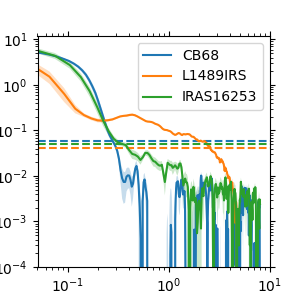

In [3]:
fig, ax = plt.subplots(figsize=(3,3))
rms = {"CB68": 0.020e-3, "L1489IRS": 0.014e-3, "IRAS16253": 0.017e-3}
color = {"CB68": "tab:blue", "L1489IRS": "tab:orange", "IRAS16253": "tab:green"}
for source in sources:
    r, I, dI = profiles[source]
    ax.plot(r, I*1e3, label=source, color=color[source])
    ax.fill_between(r, I*1e3-dI*1e3, I*1e3+dI*1e3, alpha=0.25)
    ax.set(yscale="log", xscale="log", xlim=(0,FOV[source]))
    ax.axhline(3*rms[source]*1e3, color=color[source], ls="dashed")
    ax.set(xlim=(5e-2, 10), ylim=(1e-4), xlabel="Radius [au]", ylabel="mJy / beam")
    ax.tick_params(which="both", top=True, right=True)
ax.legend()

Applying curve-of-growth method...
total flux density: 54.8+/-0.4 mJy
90 percentile radius: 0.24146204814306 arcsec
Applying curve-of-growth method...
total flux density: 88.4+/-0.9 mJy
90 percentile radius: 3.57269014418112 arcsec
Applying curve-of-growth method...
total flux density: 16.8+/-0.4 mJy
90 percentile radius: 1.313508942723384 arcsec


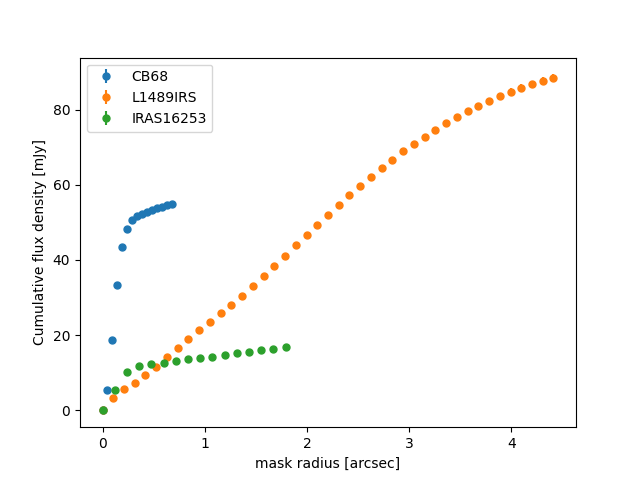

In [10]:
plt.figure()

for source in sources:

# source = "IRAS16253"
    PA = source_dict[source]["PA"]
    incl = source_dict[source]["incl"]
    rmax = 8
    imagename = "./eDisk_diskradius/{}_SBLB_continuum_robust_{}.image.tt0.fits".format(source, source_dict[source]["rep_robust"])
    image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
    r, cum_f, cum_df = image.get_cumulative_flux(PA=PA, incl=incl, rmax=rmax, rms=rms[source], criteria="1sigma")
    print("total flux density: {:.1f}+/-{:.1f} mJy".format(np.max(cum_f)*1e3, cum_df[np.argmax(cum_f)]*1e3))
    print("90 percentile radius: {} arcsec".format(r[np.argmin(np.abs(cum_f - 0.9*np.max(cum_f)))]))
    plt.errorbar(r, np.array(cum_f)*1e3, yerr=np.array(cum_df)*1e3, fmt="o", label=source, markersize=5)

plt.xlabel("mask radius [arcsec]")
plt.ylabel("Cumulative flux density [mJy]")
plt.legend()

<ErrorbarContainer object of 3 artists>

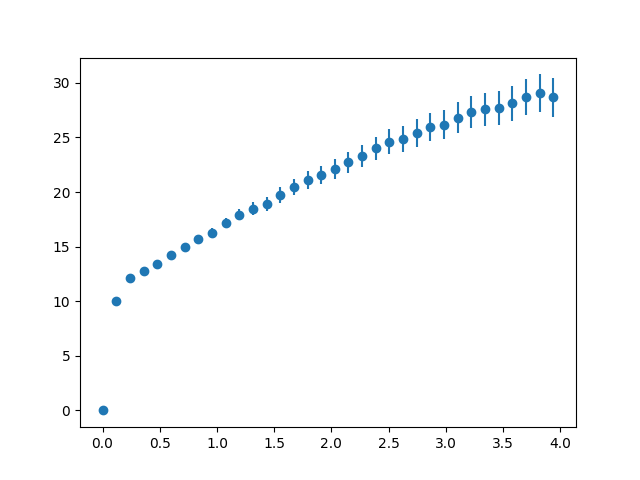

In [103]:
plt.figure()
plt.errorbar(r, np.array(cum_f)*1e3, yerr=np.array(cum_df)*1e3, fmt="o")

In [12]:
54*0.9

48.6

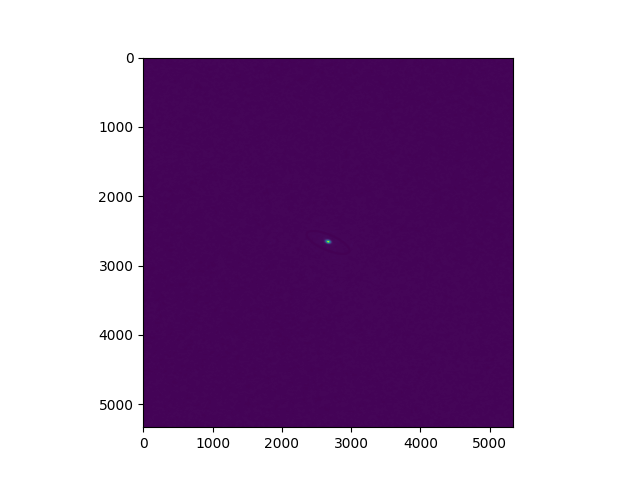

In [98]:
r, t = image.get_disk_coord(PA=PA, incl=incl)
plt.figure()
plt.imshow(image.data)
plt.contour(r, levels=[1])

In [52]:
rms = 2e-5
image.get_flux(PA=PA, incl=incl, rmax=0.5, rms=rms)

(0.05342268, 0.00029244637810113663)

In [43]:
mask = image.get_mask(PA=PA, incl=incl, rmax=0.5).flatten()
tointeg = image.data.flatten()[mask]
tointeg.size
df = rms * np.sqrt(2 * tointeg.size * image.dpix**2 / image.Omega_beam_arcsec2) * image.dpix**2 / image.Omega_beam_arcsec2

In [47]:
ave = np.mean(tointeg)
ave

0.00049971585

In [48]:
image.Omega_beam_arcsec2 / image.dpix**2

224.93570392329008

In [49]:
tointeg.size

24047

In [26]:
np.nonzero(mask)[0].size

24047

In [60]:
f = np.sum(tointeg) * (24047 / 225) / 24047
f

0.053407410515679245

In [69]:
rms * np.sqrt(2 * 24047 / 225) 

0.0002924045903272458

In [72]:
rms * np.sqrt(2 * tointeg.size * image.dpix**2 / image.Omega_beam_arcsec2) * np.sqrt(tointeg.size) * image.dpix**2 / image.Omega_beam_arcsec2

0.0002016128934834281

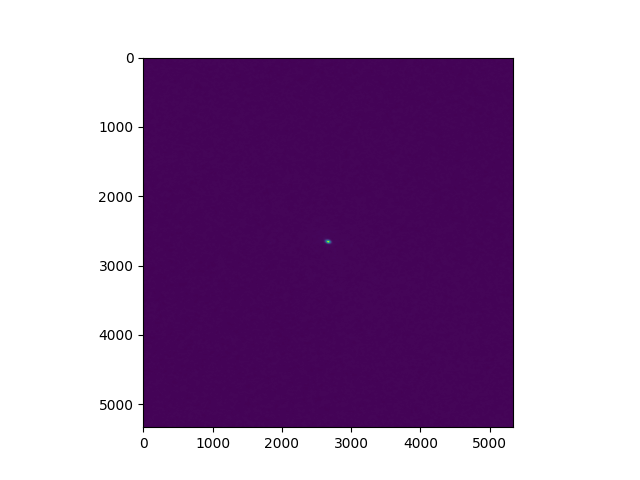

In [16]:
plt.figure()
plt.imshow(image.data)

<ErrorbarContainer object of 3 artists>

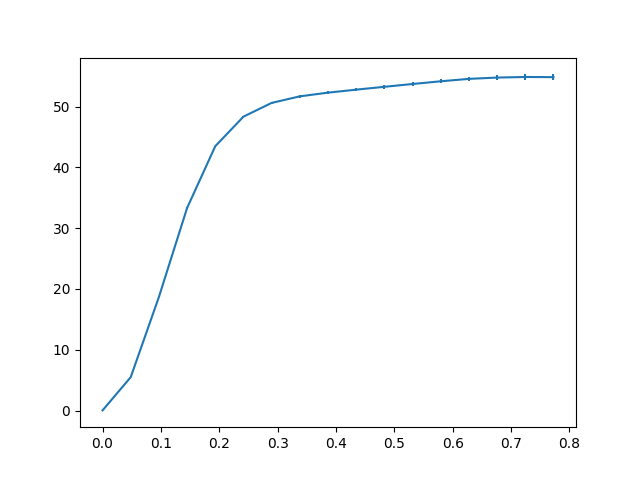

In [74]:
plt.figure()
plt.errorbar(r, np.array(cum_f)*1e3, yerr=np.array(cum_df)*1e3)

8


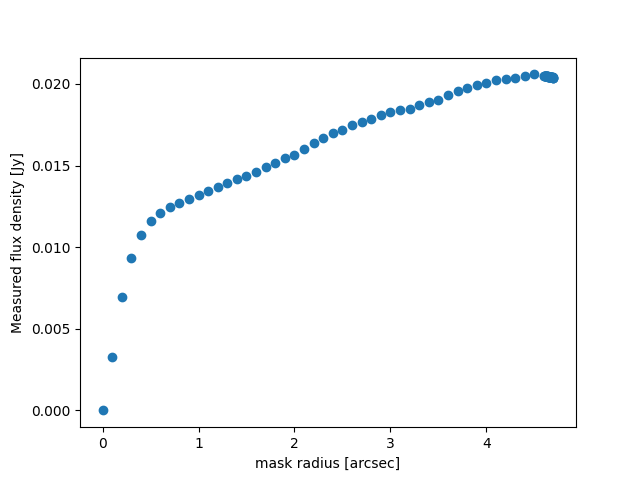

In [5]:
print(rmax)
rmax = 8
source = "IRAS16253"
imagename = "./eDisk_diskradius/{}_SBLB_continuum_robust_{}.pbcor.tt0.fits".format(source, source_dict[source]["rep_robust"])
image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))

dr = 0.1
mask_radius = np.arange(0, 8, dr)
# flux_array = []
# f = 0.0
# f_prev = 0.0
# r = 0.0

plt.figure()


f_prev = 0.0
for r in mask_radius:
    image.get_mask(PA=PA, incl=incl, rmax=r)
    f = np.sum(image.data * image.mask) / image.Omega_beam_arcsec2 * image.dpix**2

    if f < f_prev:
        break
    else:
        f_prev = f
        plt.scatter(r, f, color="tab:blue")


plt.xlabel("mask radius [arcsec]")
plt.ylabel("Measured flux density [Jy]")


ddr = image.dpix
mask_radius = np.arange(r, r+dr, ddr)

f_prev = 0.0
for r in mask_radius:
    image.get_mask(PA=PA, incl=incl, rmax=r)
    f = np.sum(image.data * image.mask) / image.Omega_beam_arcsec2 * image.dpix**2

    if f < f_prev-0.01:
        break
    else:
        # print(f)
        f_prev = f
        plt.scatter(r, f, color="tab:blue")
# for r in mask_radius:
#     image.get_mask(PA=PA, incl=incl, rmax=r)
#     flux = np.sum(image.data * image.mask) / image.Omega_beam_arcsec2 * image.dpix**2

#     flux_array.append(flux)

# plt.figure()
# plt.plot(mask_radius, flux_array)


In [12]:
image.dpix

0.0029999999931165484